<a href="https://colab.research.google.com/github/IreneDeNevi/bank-marketing-campaign-analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score)
from imblearn.over_sampling import SMOTE

In [ ]:
# EDA analysis

In [ ]:
df = pd.read_csv("/content/marketing_data (1).csv")

In [ ]:
print("\n INFORMAZIONI DATASET")
print(f"Numero di record: {len(df)}")
print(f"Numero di variabili: {len(df.columns)}")
print(f"\nPrime 20 righe del dataset:")
print(df.head(n=20))
print(f"\nUltime 20 righe del dataset:")
print(df.tail(n=20))


 INFORMAZIONI DATASET
Numero di record: 43097
Numero di variabili: 17

Prime 20 righe del dataset:
     age           job   marital  education default  balance housing loan  \
0   58.0    management   married   tertiary      no     2143     yes   no   
1   44.0    technician    single  secondary      no       29     yes   no   
2   33.0  entrepreneur   married  secondary      no        2     yes  yes   
3   47.0   blue-collar   married    unknown      no     1506     yes   no   
4   33.0       unknown    single    unknown      no        1      no   no   
5   35.0    management   married   tertiary      no      231     yes   no   
6   28.0    management    single   tertiary      no      447     yes  yes   
7   42.0  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58.0       retired   married    primary      no      121     yes   no   
9   43.0    technician    single  secondary      no      593     yes   no   
10  41.0        admin.  divorced  secondary      no  

In [ ]:
print("\n STRUTTURA")
df.info()



 STRUTTURA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43074 non-null  float64
 1   job        43097 non-null  object 
 2   marital    43097 non-null  object 
 3   education  43097 non-null  object 
 4   default    43097 non-null  object 
 5   balance    43097 non-null  int64  
 6   housing    43097 non-null  object 
 7   loan       43097 non-null  object 
 8   contact    43039 non-null  object 
 9   day        43097 non-null  int64  
 10  month      43097 non-null  object 
 11  campaign   43097 non-null  int64  
 12  pdays      43097 non-null  int64  
 13  previous   43097 non-null  int64  
 14  Location   43097 non-null  object 
 15  poutcome   43087 non-null  object 
 16  y          43097 non-null  object 
dtypes: float64(1), int64(5), object(11)
memory usage: 5.6+ MB


In [ ]:
print("\n STATS")
print(df.describe())


 STATS
                age        balance           day      campaign         pdays  \
count  43074.000000   43097.000000  43097.000000  43097.000000  43097.000000   
mean      41.297674    1342.323596     15.858157      2.796622     38.725155   
std       12.240857    2990.087062      8.429079      3.144191     98.700477   
min       18.000000   -8019.000000      1.000000      1.000000     -1.000000   
25%       33.000000      67.000000      8.000000      1.000000     -1.000000   
50%       39.000000     437.000000     16.000000      2.000000     -1.000000   
75%       48.000000    1400.000000     21.000000      3.000000     -1.000000   
max      150.000000  102127.000000     99.000000     63.000000    871.000000   

           previous  
count  43097.000000  
mean       0.550154  
std        2.280486  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000  


In [ ]:
print("\n VALORI MANCANTI")
print(df.isnull().sum())


 VALORI MANCANTI
age          23
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact      58
day           0
month         0
campaign      0
pdays         0
previous      0
Location      0
poutcome     10
y             0
dtype: int64


In [ ]:
# Data cleaning
df.replace("unknown", np.nan, inplace=True)

In [ ]:
# Per le variabili categoriche: imputiamo con "unknown"
for col in df.select_dtypes(include="object"):
    df[col].fillna("unknown", inplace=True)

# Per le variabili numeriche: imputiamo con la mediana
for col in df.select_dtypes(include="number"):
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-3684713545.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("unknown", inplace=True)
/tmp/ipython-input-3684713545.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
print(df.isnull().sum())  # check dopo il cleaning

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
Location     0
poutcome     0
y            0
dtype: int64



In [ ]:
# encoding vars binarie
binary_cols = ['default', 'housing', 'loan', 'y']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


In [ ]:
df = pd.get_dummies(df, drop_first=True)
"""
drop_first=True
Evita multicollinearità
"""
print(f"Numero di features dopo encoding: {len(df.columns)}")

Numero di features dopo encoding: 71


In [ ]:
target_dist = df['y'].value_counts()
print(f"Classe 0 (No subscription): {target_dist[0]} ({target_dist[0]/len(df)*100:.2f}%)")
print(f"Classe 1 (Subscription): {target_dist[1]} ({target_dist[1]/len(df)*100:.2f}%)")

Classe 0 (No subscription): 39925 (92.64%)
Classe 1 (Subscription): 3172 (7.36%)


In [ ]:
# Il dataset è sbilanciato verso no-subs --> SMOTE

In [ ]:
X = df.drop("y", axis=1) # features
y = df["y"] # target


In [ ]:
print(f"\nShape X (features): {X.shape}")
print(f"Shape y (target): {y.shape}")


Shape X (features): (43097, 70)
Shape y (target): (43097,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Train set: 30167 samples
Test set: 12930 samples


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(f"Distribuzione PRIMA di SMOTE:")
print(f"  Classe 0: {sum(y_train == 0)}")
print(f"  Classe 1: {sum(y_train == 1)}")

Distribuzione PRIMA di SMOTE:
  Classe 0: 27947
  Classe 1: 2220


In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
print(f"\nDistribuzione DOPO SMOTE:")
print(f"  Classe 0: {sum(y_train_balanced == 0)}")
print(f"  Classe 1: {sum(y_train_balanced == 1)}")


Distribuzione DOPO SMOTE:
  Classe 0: 27947
  Classe 1: 27947


In [ ]:
# Training dei modelli selezionati (LR, RF, XGBOOST)
results = {}

In [ ]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_balanced, y_train_balanced)
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

results['Logistic Regression'] = {
    'predictions': y_pred_lr,
    'probabilities': y_prob_lr,
    'model': lr_model
}

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

results['Random Forest'] = {
    'predictions': y_pred_rf,
    'probabilities': y_prob_rf,
    'model': rf_model
}

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_balanced, y_train_balanced)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

results['XGBoost'] = {
    'predictions': y_pred_xgb,
    'probabilities': y_prob_xgb,
    'model': xgb_model
}


In [ ]:
# Tabella di confronto
comparison_df = pd.DataFrame()

for model_name, result in results.items():
    y_pred = result['predictions']
    y_prob = result['probabilities']
    model = result['model']
    print(f"{model_name.upper()}")

    # Metriche
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    comparison_df = pd.concat([comparison_df, pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'ROC-AUC': [roc_auc]
    })], ignore_index=True)

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(f"\nTrue Negatives: {cm[0,0]}")
    print(f"False Positives: {cm[0,1]}")
    print(f"False Negatives: {cm[1,0]}")
    print(f"True Positives: {cm[1,1]}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred,
                                target_names=['No Subscription', 'Subscription']))

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")


LOGISTIC REGRESSION

Confusion Matrix:
[[9027 2951]
 [ 367  585]]

True Negatives: 9027
False Positives: 2951
False Negatives: 367
True Positives: 585

Classification Report:
                 precision    recall  f1-score   support

No Subscription       0.96      0.75      0.84     11978
   Subscription       0.17      0.61      0.26       952

       accuracy                           0.74     12930
      macro avg       0.56      0.68      0.55     12930
   weighted avg       0.90      0.74      0.80     12930

Accuracy:  0.7434
Precision: 0.1654
Recall:    0.6145
F1-Score:  0.2607
ROC-AUC:   0.7625
RANDOM FOREST

Confusion Matrix:
[[10953  1025]
 [  523   429]]

True Negatives: 10953
False Positives: 1025
False Negatives: 523
True Positives: 429

Classification Report:
                 precision    recall  f1-score   support

No Subscription       0.95      0.91      0.93     11978
   Subscription       0.30      0.45      0.36       952

       accuracy                           0

In [ ]:
print(comparison_df.to_string(index=False))

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.743387   0.165441 0.614496  0.260695 0.762477
      Random Forest  0.880278   0.295048 0.450630  0.356608 0.777681
            XGBoost  0.927146   0.513441 0.200630  0.288520 0.785913


In [ ]:
best_model_idx = comparison_df['ROC-AUC'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_roc_auc = comparison_df.loc[best_model_idx, 'ROC-AUC']

In [ ]:

print(f"MIGLIOR MODELLO: {best_model_name}")
print(f"ROC-AUC Score: {best_roc_auc:.4f}")

MIGLIOR MODELLO: XGBoost
ROC-AUC Score: 0.7859


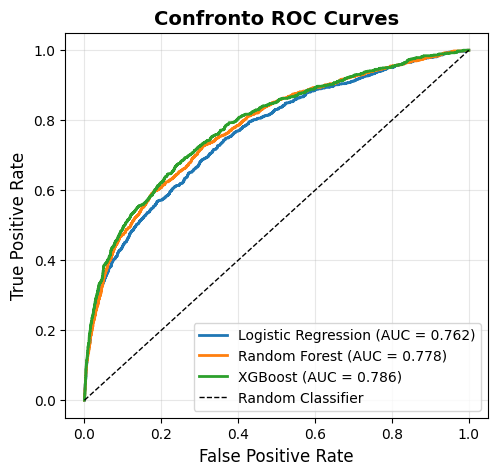

In [ ]:
# ROC Curves Comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for model_name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    roc_auc = roc_auc_score(y_test, result['probabilities'])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Confronto ROC Curves', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)


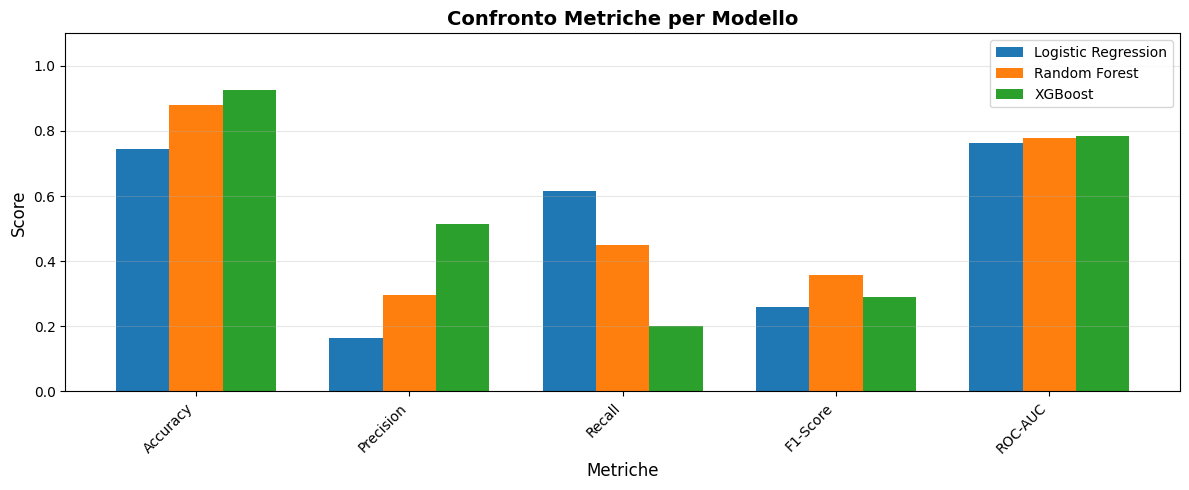

In [ ]:
# Confronto Metriche
plt.figure(figsize=(12, 5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

for i, model_name in enumerate(results.keys()):
    model_metrics = comparison_df[comparison_df['Model'] == model_name][metrics].values[0]
    plt.bar(x + i*width, model_metrics, width, label=model_name)

plt.xlabel('Metriche', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Confronto Metriche per Modello', fontsize=14, fontweight='bold')
plt.xticks(x + width, metrics, rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

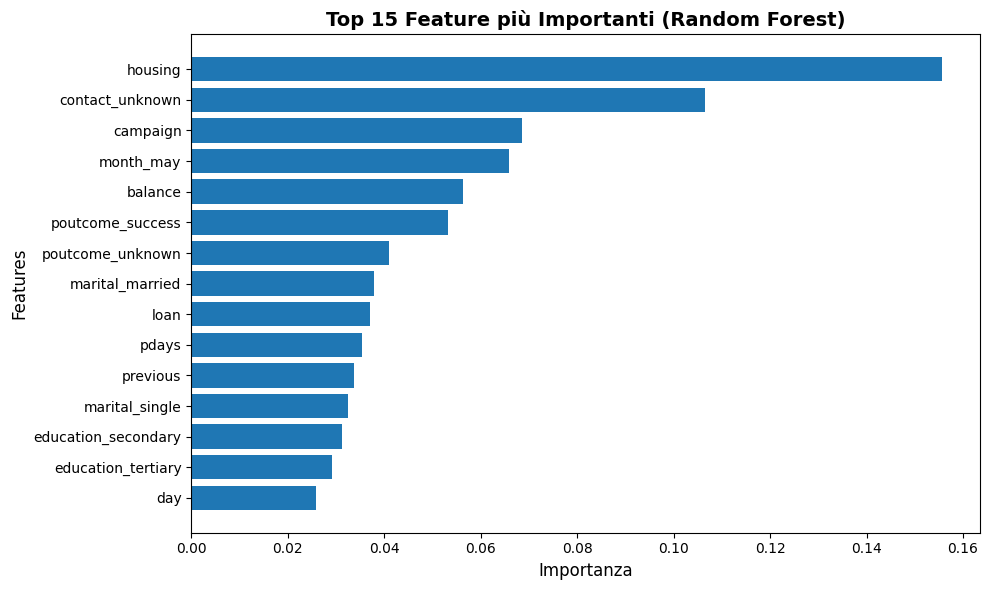

In [ ]:
# Feature Importance per Random Forest
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Importanza', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Feature più Importanti (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
"""
Il ROC-AUC misura la capacità del modello di distinguere tra le due classi (subscription vs no subscription).

Con un valore di 0.7859, XGBoost mostra la migliore discriminazione tra i tre modelli testati.

NOTE:

1. XGBoost ha alta precisione (0.51) -> pochi falsi positivi.

2. recall basso (0.20) -> molti abbonati reali non vengono identificati.

In pratica, XGBoost è molto conservativo: quando predice un abbonamento, è spesso corretto, ma ne perde parecchi.

Anche se ho selezionato il miglio modello per  ROC-AUC, il modello Random Forest ha i risultati più bilanciati tra i tre modelli selezionati e ha F1 score migliore
"""